<a href="https://colab.research.google.com/github/saifulislamsarfaraz/Statistics-for-Data-Science/blob/main/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Md Saiful 

Id :2019-2-60-040

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('dataset_multiple_LR.csv')
df.head()

,Age,Weight,Blood Pressure
0,52,173,132
1,59,184,143
2,67,194,153
3,73,211,162
4,64,196,154


In [155]:
x1 =  np.array(df['Age'])
x2 =  np.array(df['Weight'])
y =  np.array(df['Blood Pressure'])

In [156]:
x0=[]
x0 = np.array([1 for i in range(len(x1))] )
print(x0)


[1 1 1 1 1 1 1 1 1 1 1]


In [157]:
matA=[]
for i in range(len(x0)):
    g=[]
    for j in range(1):
        g.append(x0[i])
        g.append(x1[i])
        g.append(x2[i])
    matA.append(g)
for i in range(11): 
    for j in range(3): 
        print(matA[i][j], end = " ") 
    print() 

1 52 173 
1 59 184 
1 67 194 
1 73 211 
1 64 196 
1 74 220 
1 54 188 
1 61 188 
1 65 207 
1 46 167 
1 72 217 


In [158]:
matA

[[1, 52, 173],
 [1, 59, 184],
 [1, 67, 194],
 [1, 73, 211],
 [1, 64, 196],
 [1, 74, 220],
 [1, 54, 188],
 [1, 61, 188],
 [1, 65, 207],
 [1, 46, 167],
 [1, 72, 217]]

In [159]:
matB = []

for i in range(len(y)):
    g=[]
    g.append(y[i])
    matB.append(g)

for i in range(11): 
    for j in range(1): 
        print(matB[i][j]) 

132
143
153
162
154
168
137
149
159
128
166


In [207]:
def mymultiplication(matA,matB):
  matrix = np.zeros(len(matA)*len(matB[0])).reshape(len(matA),len(matB[0]))
  # iterate through rows of r1
  for x in range(len(matA)):
      # iterate through columns of c2
      for y in range(len(matB[0])):
          # iterate through rows of r2
          for z in range(len(matA[0])):
              matrix[x][y] += matA[x][z] * matB[z][y]
  return matrix

In [51]:
"""
def transpose(matrix):
    rows = len(matrix)
    columns = len(matrix[0])

    return [[matrix[row][col] for row in range(rows)] for col in range(columns)]
"""


'\ndef transpose(matrix):\n    rows = len(matrix)\n    columns = len(matrix[0])\n\n    return [[matrix[row][col] for row in range(rows)] for col in range(columns)]\n'

In [161]:
def mytranspose(matrix):
  mat_trans = np.zeros(len(matrix)*len(matrix[0])).reshape(len(matrix[0]),len(matrix))
  for j in range(len(matrix)):
    for i in range(len(matrix[0])):
      mat_trans[i][j] = matrix[j][i]
  return mat_trans

In [162]:
#mat1
matA_T = mytranspose(matA)
matA_T


array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [ 52.,  59.,  67.,  73.,  64.,  74.,  54.,  61.,  65.,  46.,  72.],
       [173., 184., 194., 211., 196., 220., 188., 188., 207., 167., 217.]])

In [208]:
np.set_printoptions(suppress=True)
A = mymultiplication(matA_T,matA)
A

array([[    11.,    687.,   2145.],
       [   687.,  43737., 135458.],
       [  2145., 135458., 421273.]])

In [209]:
def delete_row_column(matrix, i, j):#1 0
    rows = len(matrix)#3
    columns = len(matrix[0])#3
    # mat = np.zeros((len(matrix)-1)*(len(matrix[0])-1)).reshape((len(matrix[0])-1),(len(matrix)-1))
    # #print(mat)
    # for row in range(rows):
    #   for col in range(columns):
    #     if(col!=j or rows!=i):
    #       mat.append(matrix[row][col])
    # print(mat)
    # return mat
    return [[matrix[row][col] for col in range(columns) if col != j] for row in range(rows) if row != i]

In [214]:
def minor(matrix, i, j):
    matrix = delete_row_column(matrix, i, j)
    #print(matrix)
    return det(matrix)


In [210]:
def det(matrix):
    order = len(matrix)
    if order == 1:
        return matrix[0][0]
    elif order == 2:
        determinant = (matrix[0][0] * matrix[1][1]) - (matrix[0][1] * matrix[1][0])  # ad - bc
        return determinant
    else:
        determinant = 0
        for i in range(order):
            coefficient = matrix[0][i]
            if i % 2 == 1:
                coefficient *= -1
            determinant += coefficient * minor(matrix, 0, i)
        return determinant

In [212]:
def inv(matrix):
    order = len(matrix)
    determinant = det(matrix)
    #print(determinant)
    cofactors = []
    for i in range(order):
        cofactors_row = []
        for j in range(order):
            coefficient = pow(-1,((i+1)+(j+1))) # For the chequered pattern of + and -
            #print(coefficient)
            cofactors_row.append(coefficient * minor(matrix, i, j))
        cofactors.append(cofactors_row)
    #print(cofactors)
    adjugate = mytranspose(cofactors)
    #print(adjugate)
    inverse = [[element / determinant for element in row] for row in adjugate]  # Divide by determinant
    return inverse

In [215]:
Ainv = inv(A)

In [216]:
ID_prov = mymultiplication(A,Ainv)
ID_prov


array([[ 1., -0., -0.],
       [-0.,  1., -0.],
       [ 0.,  0.,  1.]])

In [217]:
C = mymultiplication(matA_T,matB)
C

array([[  1651.],
       [104328.],
       [324235.]])

In [218]:
W = mymultiplication(Ainv,C)
W

array([[30.99410295],
       [ 0.86141469],
       [ 0.3348592 ]])

In [219]:
W1 = W[1]
W2 = W[2]
Y = W[0] + W1*x1 + W2*x2
Y

array([133.71830776, 143.43166173, 153.6715712 , 164.53266567,
       151.75704553, 168.40781313, 140.46402509, 146.49392789,
       156.30191139, 126.54066446, 165.68040616])

In [220]:
print(y)

[132 143 153 162 154 168 137 149 159 128 166]


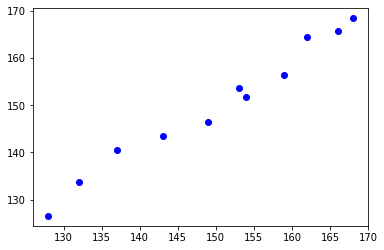

In [221]:
from pyparsing import line
plt.scatter(y,Y , c ="blue")
#plt.plot(y,Y, color='red',linestyle='-')
plt.show()

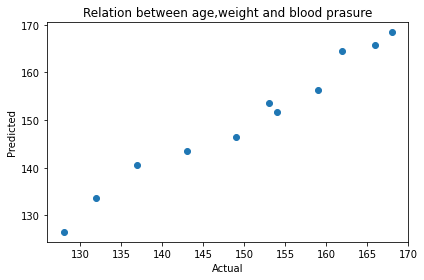

In [ ]:
from matplotlib import pyplot as plt
plt.title('Relation between age,weight and blood prasure')
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.scatter(y,Y,vmin=6)
plt.tight_layout()
plt.show()

## Using Library 

In [28]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(df[['Age','Weight']],df[['Blood Pressure']])

LinearRegression()

In [37]:
reg.predict([[46,167]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[126.54066446]])

Here we for Age 46 and 167 predict value is 126.54 we get same result from multiple linear regrassion without using library function.so we can say thet our model is acurate.

### Create model, Split train and test from dataset

In [77]:
C=df.drop("Blood Pressure", axis=1)
D=df["Blood Pressure"]

In [78]:
C

,Age,Weight
0,52,173
1,59,184
2,67,194
3,73,211
4,64,196
5,74,220
6,54,188
7,61,188
8,65,207
9,46,167


In [35]:
D

0     132
1     143
2     153
3     162
4     154
5     168
6     137
7     149
8     159
9     128
10    166
Name: Blood Pressure, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
xtrain, xtest, ytrain, ytest = train_test_split(C, D, test_size=.25)

In [80]:
xtest

,Age,Weight
0,52,173
10,72,217
5,74,220


In [81]:
ytest

0     132
10    166
5     168
Name: Blood Pressure, dtype: int64

In [104]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(xtrain, ytrain)
ypredtest = reg.predict(xtest)
print(ypredtest)
#print(reg.intercept_)
print('Coefficients: ', reg.coef_) 
print('Variance score: {}'.format(reg.score(xtest, ytest)))

[134.38956495 165.28037317 167.95120843]
Coefficients:  [0.88729738 0.29874683]
Variance score: 0.9923897426390551


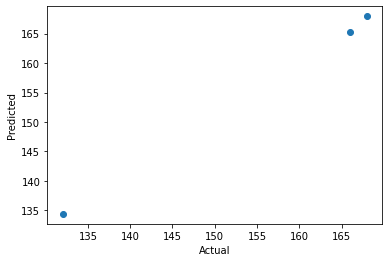

In [105]:
plt.scatter(ytest,ypredtest);
plt.xlabel('Actual');
plt.ylabel('Predicted');